In [1]:
from insurance_cleaning import insurance_cleaning as ic
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import pickle
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

Boxplot


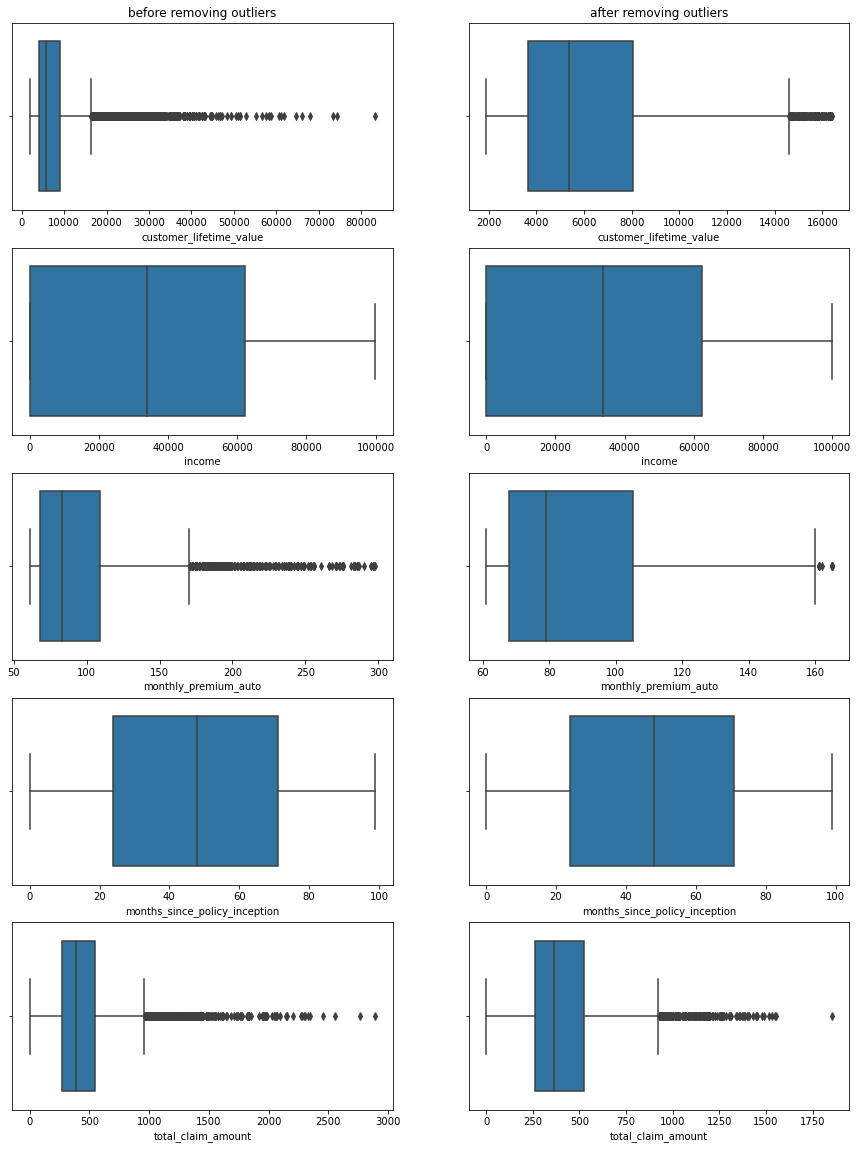

Discrete


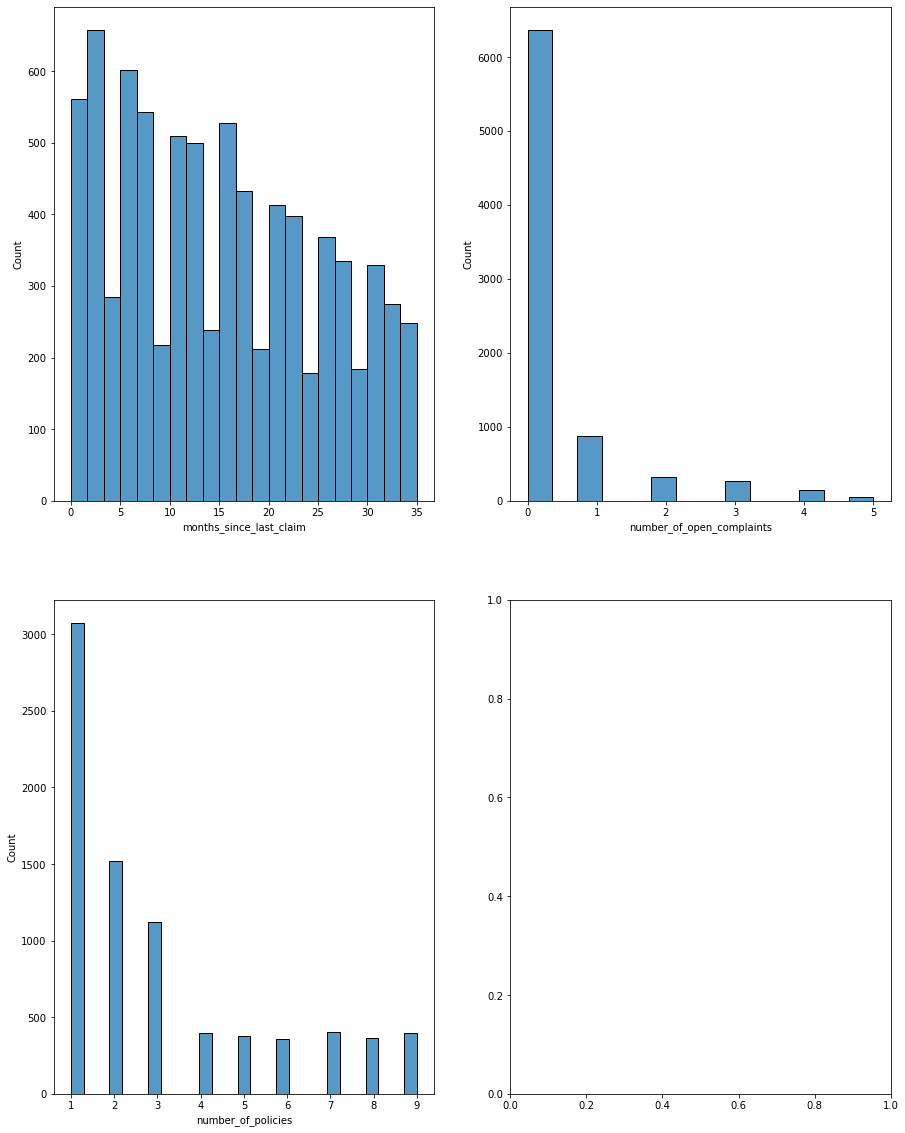

Continous


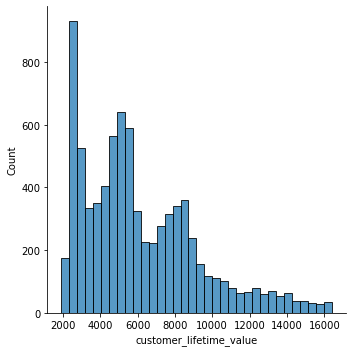

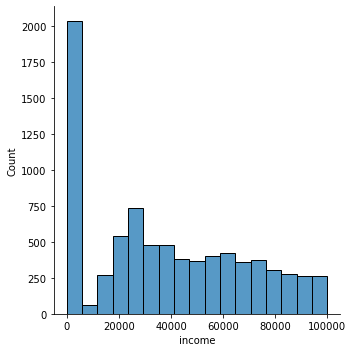

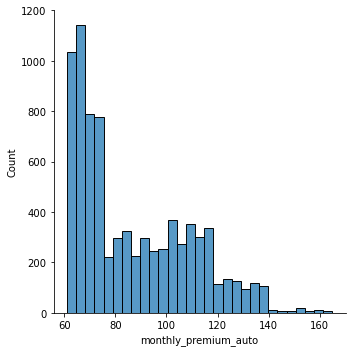

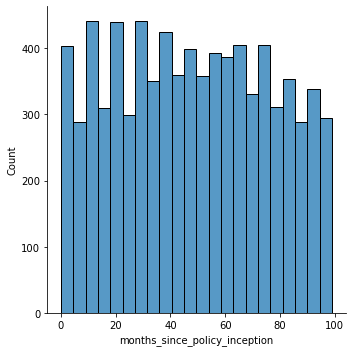

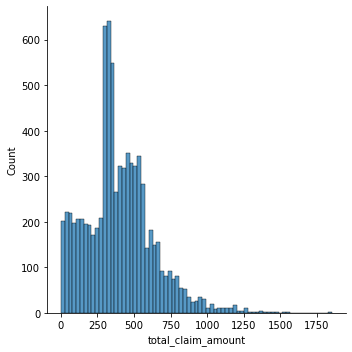

In [2]:
data = ic.clean_insurance_data("files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv")

In [3]:
display(data)

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,...,32,5,0,1,Corporate Auto,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,...,13,42,0,8,Personal Auto,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,...,18,38,0,2,Personal Auto,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,...,18,65,0,7,Corporate Auto,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,...,12,44,0,1,Personal Auto,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9128,California,4100.398533,No,Premium,College,2011-01-06,Employed,F,47761,Suburban,...,16,58,0,1,Personal Auto,Offer1,Branch,541.282007,Four-Door Car,Large
9130,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,Suburban,...,14,28,0,1,Corporate Auto,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,Suburban,...,9,37,3,2,Corporate Auto,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,Suburban,...,34,3,0,3,Personal Auto,Offer3,Branch,691.200000,Four-Door Car,Large


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8016 entries, 0 to 9133
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   state                          8016 non-null   object        
 1   customer_lifetime_value        8016 non-null   float64       
 2   response                       8016 non-null   object        
 3   coverage                       8016 non-null   object        
 4   education                      8016 non-null   object        
 5   effective_to_date              8016 non-null   datetime64[ns]
 6   employmentstatus               8016 non-null   object        
 7   gender                         8016 non-null   object        
 8   income                         8016 non-null   int64         
 9   location_code                  8016 non-null   object        
 10  marital_status                 8016 non-null   object        
 11  monthly_premium_a

In [5]:
# 1. In this final lab, we will model our data. Import sklearn train_test_split and separate the data.

In [6]:
# 3. Create a copy of the dataframe for the data wrangling.

In [7]:
data_copy = data.copy()

In [8]:
X = data_copy.drop(columns=["total_claim_amount"])
y = data_copy["total_claim_amount"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [10]:
y_test = pd.DataFrame(y_test, columns = ["total_claim_amount"])
y_train = pd.DataFrame(y_train, columns = ["total_claim_amount"])

In [11]:
X_train_num = X_train.select_dtypes(np.number)
X_test_num = X_test.select_dtypes(np.number)
X_train_cat = X_train.select_dtypes(include=["datetime64", "object"])
X_test_cat = X_test.select_dtypes(include=["datetime64", "object"])


In [12]:
display(X_train_num)
display(X_train_cat)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
6078,2510.593651,0,70,25,30,0,1
7034,2839.298304,71460,74,11,77,5,1
6286,13055.570870,58684,162,4,77,0,9
2662,8986.610653,66267,111,23,95,0,3
6066,12564.067750,0,68,15,52,0,2
...,...,...,...,...,...,...,...
5599,4772.943848,20993,133,35,90,0,1
3707,10594.132490,64669,131,22,32,0,6
1879,6259.477847,0,83,8,78,0,4
2963,8262.879764,0,76,4,51,1,2


,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size
6078,Arizona,No,Basic,Bachelor,2011-01-03,Unemployed,M,Suburban,Single,Personal Auto,Offer1,Agent,Four-Door Car,Small
7034,Oregon,No,Basic,High School or Below,2011-02-04,Employed,M,Rural,Married,Personal Auto,Offer2,Call Center,Four-Door Car,Medsize
6286,Oregon,No,Premium,High School or Below,2011-01-26,Employed,M,Suburban,Married,Personal Auto,Offer1,Web,SUV,Medsize
2662,California,No,Premium,High School or Below,2011-01-26,Employed,M,Suburban,Married,Personal Auto,Offer3,Web,Four-Door Car,Small
6066,California,No,Basic,Doctor,2011-01-14,Unemployed,M,Suburban,Married,Personal Auto,Offer2,Web,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5599,California,Yes,Extended,High School or Below,2011-02-18,Retired,M,Suburban,Divorced,Personal Auto,Offer2,Agent,SUV,Medsize
3707,Oregon,No,Extended,High School or Below,2011-01-19,Employed,M,Suburban,Married,Personal Auto,Offer4,Call Center,Sports Car,Small
1879,Oregon,No,Extended,College,2011-02-28,Unemployed,F,Urban,Married,Personal Auto,Offer2,Agent,Four-Door Car,Medsize
2963,Nevada,No,Extended,College,2011-02-13,Unemployed,F,Rural,Married,Personal Auto,Offer1,Agent,Four-Door Car,Medsize


In [13]:
X_train_num_cont = X_train_num[["customer_lifetime_value", "income", "monthly_premium_auto", "months_since_policy_inception"]]
X_train_num_disc = X_train_num.drop(columns =["customer_lifetime_value", "income", "monthly_premium_auto", "months_since_policy_inception"]).reset_index(drop=True)
X_test_num_cont = X_test_num[["customer_lifetime_value", "income", "monthly_premium_auto", "months_since_policy_inception"]]
X_test_num_disc = X_test_num.drop(columns =["customer_lifetime_value", "income", "monthly_premium_auto", "months_since_policy_inception"]).reset_index(drop=True)

In [14]:
display(X_train_num_cont)
display(X_train_num_disc)

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception
6078,2510.593651,0,70,30
7034,2839.298304,71460,74,77
6286,13055.570870,58684,162,77
2662,8986.610653,66267,111,95
6066,12564.067750,0,68,52
...,...,...,...,...
5599,4772.943848,20993,133,90
3707,10594.132490,64669,131,32
1879,6259.477847,0,83,78
2963,8262.879764,0,76,51


,months_since_last_claim,number_of_open_complaints,number_of_policies
0,25,0,1
1,11,5,1
2,4,0,9
3,23,0,3
4,15,0,2
...,...,...,...
6007,35,0,1
6008,22,0,6
6009,8,0,4
6010,4,1,2


In [15]:
# 4. Normalize the continuous variables. You can use any one method you want.

In [16]:
std = MinMaxScaler()

In [17]:
std.fit(X_train_num_cont)

MinMaxScaler()

In [18]:
X_standard_continous_np = std.transform(X_train_num_cont)
X_standard_continous_train = pd.DataFrame(X_standard_continous_np, columns=X_train_num_cont.columns)
X_standard_continous_np = std.transform(X_test_num_cont)
X_standard_continous_test = pd.DataFrame(X_standard_continous_np, columns=X_train_num_cont.columns)

In [19]:
display(X_standard_continous_train)

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception
0,0.042219,0.000000,0.086538,0.303030
1,0.064873,0.714736,0.125000,0.777778
2,0.768975,0.586952,0.971154,0.777778
3,0.488544,0.662796,0.480769,0.959596
4,0.735101,0.000000,0.067308,0.525253
...,...,...,...,...
6007,0.198140,0.209970,0.692308,0.909091
6008,0.599334,0.646813,0.673077,0.323232
6009,0.300591,0.000000,0.211538,0.787879
6010,0.438665,0.000000,0.144231,0.515152


In [20]:
display(X_train_cat)

,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size
6078,Arizona,No,Basic,Bachelor,2011-01-03,Unemployed,M,Suburban,Single,Personal Auto,Offer1,Agent,Four-Door Car,Small
7034,Oregon,No,Basic,High School or Below,2011-02-04,Employed,M,Rural,Married,Personal Auto,Offer2,Call Center,Four-Door Car,Medsize
6286,Oregon,No,Premium,High School or Below,2011-01-26,Employed,M,Suburban,Married,Personal Auto,Offer1,Web,SUV,Medsize
2662,California,No,Premium,High School or Below,2011-01-26,Employed,M,Suburban,Married,Personal Auto,Offer3,Web,Four-Door Car,Small
6066,California,No,Basic,Doctor,2011-01-14,Unemployed,M,Suburban,Married,Personal Auto,Offer2,Web,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5599,California,Yes,Extended,High School or Below,2011-02-18,Retired,M,Suburban,Divorced,Personal Auto,Offer2,Agent,SUV,Medsize
3707,Oregon,No,Extended,High School or Below,2011-01-19,Employed,M,Suburban,Married,Personal Auto,Offer4,Call Center,Sports Car,Small
1879,Oregon,No,Extended,College,2011-02-28,Unemployed,F,Urban,Married,Personal Auto,Offer2,Agent,Four-Door Car,Medsize
2963,Nevada,No,Extended,College,2011-02-13,Unemployed,F,Rural,Married,Personal Auto,Offer1,Agent,Four-Door Car,Medsize


In [21]:
# 5. Encode the categorical variables (See the hint below for encoding categorical data!!!)

In [22]:
X_train_cat_one = X_train_cat[["state", "response", "gender", "marital_status", "policy_type", "renew_offer_type", "sales_channel", "vehicle_class"]]
X_train_cat_ord = X_train_cat.drop(columns=["state", "response", "gender", "marital_status", "policy_type", "renew_offer_type", "sales_channel", "vehicle_class", "effective_to_date"])
X_train_date = X_train_cat[["effective_to_date"]]
X_test_cat_one = X_test_cat[["state", "response", "gender", "marital_status", "policy_type", "renew_offer_type", "sales_channel", "vehicle_class"]]
X_test_cat_ord = X_test_cat.drop(columns=["state", "response", "gender", "marital_status", "policy_type", "renew_offer_type", "sales_channel", "vehicle_class", "effective_to_date"])
X_test_date = X_test_cat[["effective_to_date"]]

In [23]:
display(X_train_cat_one)
display(X_train_cat_ord)
display(X_train_date)

,state,response,gender,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class
6078,Arizona,No,M,Single,Personal Auto,Offer1,Agent,Four-Door Car
7034,Oregon,No,M,Married,Personal Auto,Offer2,Call Center,Four-Door Car
6286,Oregon,No,M,Married,Personal Auto,Offer1,Web,SUV
2662,California,No,M,Married,Personal Auto,Offer3,Web,Four-Door Car
6066,California,No,M,Married,Personal Auto,Offer2,Web,Four-Door Car
...,...,...,...,...,...,...,...,...
5599,California,Yes,M,Divorced,Personal Auto,Offer2,Agent,SUV
3707,Oregon,No,M,Married,Personal Auto,Offer4,Call Center,Sports Car
1879,Oregon,No,F,Married,Personal Auto,Offer2,Agent,Four-Door Car
2963,Nevada,No,F,Married,Personal Auto,Offer1,Agent,Four-Door Car


,coverage,education,employmentstatus,location_code,vehicle_size
6078,Basic,Bachelor,Unemployed,Suburban,Small
7034,Basic,High School or Below,Employed,Rural,Medsize
6286,Premium,High School or Below,Employed,Suburban,Medsize
2662,Premium,High School or Below,Employed,Suburban,Small
6066,Basic,Doctor,Unemployed,Suburban,Medsize
...,...,...,...,...,...
5599,Extended,High School or Below,Retired,Suburban,Medsize
3707,Extended,High School or Below,Employed,Suburban,Small
1879,Extended,College,Unemployed,Urban,Medsize
2963,Extended,College,Unemployed,Rural,Medsize


,effective_to_date
6078,2011-01-03
7034,2011-02-04
6286,2011-01-26
2662,2011-01-26
6066,2011-01-14
...,...
5599,2011-02-18
3707,2011-01-19
1879,2011-02-28
2963,2011-02-13


In [24]:
# One Hot Encoder

In [25]:
col_list = [X_train_cat_one[col].unique() for col in X_train_cat_one.columns]

In [26]:
encoder = OneHotEncoder(handle_unknown='error', drop='first', categories=col_list)
encoder.fit(X_train_cat_one)

categoricals_train_encoded = encoder.transform(X_train_cat_one).toarray()
categoricals_test_encoded  = encoder.transform(X_test_cat_one).toarray()


X_train_cat_oneencoded = pd.DataFrame(categoricals_train_encoded, columns = encoder.get_feature_names_out())
X_test_cat_oneencoded  = pd.DataFrame(categoricals_test_encoded, columns = encoder.get_feature_names_out())
display(X_train_cat_oneencoded)
display(X_test_cat_oneencoded)

,state_Oregon,state_California,state_Nevada,state_Washington,response_Yes,gender_F,marital_status_Married,marital_status_Divorced,policy_type_Corporate Auto,policy_type_Special Auto,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Call Center,sales_channel_Web,sales_channel_Branch,vehicle_class_SUV,vehicle_class_Two-Door Car,vehicle_class_Sports Car
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6007,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6008,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
6009,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6010,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,state_Oregon,state_California,state_Nevada,state_Washington,response_Yes,gender_F,marital_status_Married,marital_status_Divorced,policy_type_Corporate Auto,policy_type_Special Auto,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Call Center,sales_channel_Web,sales_channel_Branch,vehicle_class_SUV,vehicle_class_Two-Door Car,vehicle_class_Sports Car
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2000,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2001,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [27]:
# Ordianl Encoder

In [28]:
ic.check_unique(X_train_cat_ord)

coverage


array(['Basic', 'Premium', 'Extended'], dtype=object)

Basic       3719
Extended    1833
Premium      460
Name: coverage, dtype: int64

education


array(['Bachelor', 'High School or Below', 'Doctor', 'College', 'Master'],
      dtype=object)

Bachelor                1825
College                 1785
High School or Below    1689
Master                   479
Doctor                   234
Name: education, dtype: int64

employmentstatus


array(['Unemployed', 'Employed', 'Disabled', 'Retired', 'Medical Leave'],
      dtype=object)

Employed         3734
Unemployed       1517
Medical Leave     306
Disabled          272
Retired           183
Name: employmentstatus, dtype: int64

location_code


array(['Suburban', 'Rural', 'Urban'], dtype=object)

Suburban    3758
Rural       1195
Urban       1059
Name: location_code, dtype: int64

vehicle_size


array(['Small', 'Medsize', 'Large'], dtype=object)

Medsize    4257
Small      1140
Large       615
Name: vehicle_size, dtype: int64

In [29]:
X_train_cat_ord["coverage"] = X_train_cat_ord["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
X_train_cat_ord["education"] = X_train_cat_ord["education"].map({"High School or Below" : 0, "College" : 1, "Bachelor" : 2, "Master": 3, "Doctor": 4})
X_train_cat_ord["employmentstatus"] = X_train_cat_ord["employmentstatus"].map({'Unemployed': 2, 'Employed': 0, 'Disabled': 3, 'Retired': 1, 'Medical Leave': 4})
X_train_cat_ord["location_code"] = X_train_cat_ord["location_code"].map({"Rural" : 0, "Suburban" : 1, "Urban" : 2})
X_train_cat_ord["vehicle_size"] = X_train_cat_ord["vehicle_size"].map({"Small" : 0, "Medsize" : 1, "Large" : 2})


In [30]:
X_test_cat_ord["coverage"] = X_test_cat_ord["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
X_test_cat_ord["education"] = X_test_cat_ord["education"].map({"High School or Below" : 0, "College" : 1, "Bachelor" : 2, "Master": 3, "Doctor": 4})
X_test_cat_ord["employmentstatus"] = X_test_cat_ord["employmentstatus"].map({'Unemployed': 2, 'Employed': 0, 'Disabled': 3, 'Retired': 1, 'Medical Leave': 4})
X_test_cat_ord["location_code"] = X_test_cat_ord["location_code"].map({"Rural" : 0, "Suburban" : 1, "Urban" : 2})
X_test_cat_ord["vehicle_size"] = X_test_cat_ord["vehicle_size"].map({"Small" : 0, "Medsize" : 1, "Large" : 2})

In [31]:
X_train_cat_ord = X_train_cat_ord.reset_index(drop=True)
X_test_cat_ord = X_test_cat_ord.reset_index(drop=True)


display(X_train_cat_ord)
display(X_test_cat_ord)

,coverage,education,employmentstatus,location_code,vehicle_size
0,0,2,2,1,0
1,0,0,0,0,1
2,2,0,0,1,1
3,2,0,0,1,0
4,0,4,2,1,1
...,...,...,...,...,...
6007,1,0,1,1,1
6008,1,0,0,1,0
6009,1,1,2,2,1
6010,1,1,2,0,1


,coverage,education,employmentstatus,location_code,vehicle_size
0,1,0,2,0,2
1,1,2,0,1,2
2,0,3,0,1,0
3,1,1,0,0,1
4,0,0,4,1,0
...,...,...,...,...,...
1999,1,2,3,1,1
2000,1,2,0,1,0
2001,2,0,2,1,1
2002,1,0,2,1,0


In [32]:
# 6. The time variable can be useful. Try to transform its data into a useful one. 
# Hint: Day week and month as integers might be useful.

In [33]:
def months (x):
    months = (date.today().year - x.year) * 12 + date.today().month - x.month
    return months

In [34]:
X_train_date["effective_to_date"] = X_train_date["effective_to_date"].apply(months)
X_test_date["effective_to_date"] = X_test_date["effective_to_date"].apply(months)

<ipython-input-34-66caa1c00173>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_date["effective_to_date"] = X_train_date["effective_to_date"].apply(months)
<ipython-input-34-66caa1c00173>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_date["effective_to_date"] = X_test_date["effective_to_date"].apply(months)


In [35]:
X_train_date = X_train_date.reset_index(drop=True)
X_test_date = X_test_date.reset_index(drop=True)
display(X_train_date)

,effective_to_date
0,134
1,133
2,134
3,134
4,134
...,...
6007,133
6008,134
6009,133
6010,133


In [36]:
X_train_final = pd.concat([X_standard_continous_train, X_train_num_disc, X_train_cat_oneencoded, X_train_cat_ord, X_train_date], axis = 1)
X_test_final = pd.concat([X_standard_continous_test, X_test_num_disc, X_test_cat_oneencoded, X_test_cat_ord, X_test_date], axis = 1)

In [37]:
display(X_train_final)

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,state_Oregon,state_California,state_Nevada,...,sales_channel_Branch,vehicle_class_SUV,vehicle_class_Two-Door Car,vehicle_class_Sports Car,coverage,education,employmentstatus,location_code,vehicle_size,effective_to_date
0,0.042219,0.000000,0.086538,0.303030,25,0,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,2,2,1,0,134
1,0.064873,0.714736,0.125000,0.777778,11,5,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,1,133
2,0.768975,0.586952,0.971154,0.777778,4,0,9,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,2,0,0,1,1,134
3,0.488544,0.662796,0.480769,0.959596,23,0,3,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,2,0,0,1,0,134
4,0.735101,0.000000,0.067308,0.525253,15,0,2,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0,4,2,1,1,134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6007,0.198140,0.209970,0.692308,0.909091,35,0,1,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1,0,1,1,1,133
6008,0.599334,0.646813,0.673077,0.323232,22,0,6,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1,0,0,1,0,134
6009,0.300591,0.000000,0.211538,0.787879,8,0,4,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,1,2,2,1,133
6010,0.438665,0.000000,0.144231,0.515152,4,1,2,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1,1,2,0,1,133


In [38]:
# 7. Since the model will only accept numerical data, check and make sure that every column is numerical,
# if some are not, change it using encoding.

In [39]:
X_train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6012 entries, 0 to 6011
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        6012 non-null   float64
 1   income                         6012 non-null   float64
 2   monthly_premium_auto           6012 non-null   float64
 3   months_since_policy_inception  6012 non-null   float64
 4   months_since_last_claim        6012 non-null   int64  
 5   number_of_open_complaints      6012 non-null   int64  
 6   number_of_policies             6012 non-null   int64  
 7   state_Oregon                   6012 non-null   float64
 8   state_California               6012 non-null   float64
 9   state_Nevada                   6012 non-null   float64
 10  state_Washington               6012 non-null   float64
 11  response_Yes                   6012 non-null   float64
 12  gender_F                       6012 non-null   f

In [40]:
X_train_final.isna().sum()

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_policy_inception    0
months_since_last_claim          0
number_of_open_complaints        0
number_of_policies               0
state_Oregon                     0
state_California                 0
state_Nevada                     0
state_Washington                 0
response_Yes                     0
gender_F                         0
marital_status_Married           0
marital_status_Divorced          0
policy_type_Corporate Auto       0
policy_type_Special Auto         0
renew_offer_type_Offer2          0
renew_offer_type_Offer3          0
renew_offer_type_Offer4          0
sales_channel_Call Center        0
sales_channel_Web                0
sales_channel_Branch             0
vehicle_class_SUV                0
vehicle_class_Two-Door Car       0
vehicle_class_Sports Car         0
coverage                         0
education                        0
employmentstatus    

In [41]:
# 8. Try a simple linear regression with all the data to see whether we are getting good results.

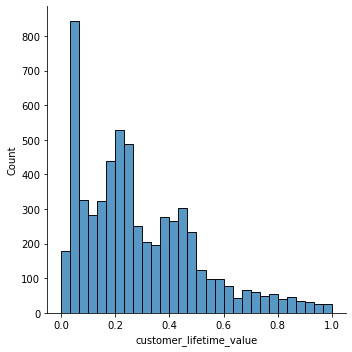

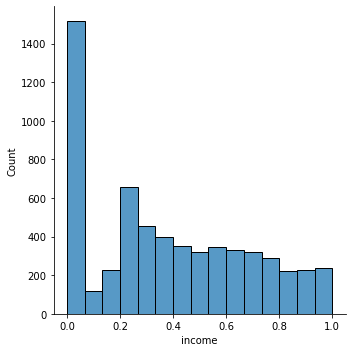

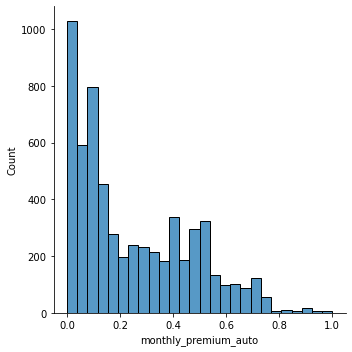

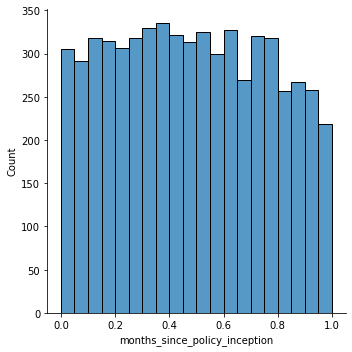

In [42]:
ic.plot_continous_var(X_standard_continous_train)

In [43]:
lm = LinearRegression()
lm.fit(X_train_final,y_train)
print(lm.score(X_test_final, y_test))

y_pred = lm.predict(X_test_final)


print("-----------------------------")
print("R2:",r2_score(y_test , y_pred))
print("MSE:",mean_squared_error(y_test , y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test , y_pred)))
print("MAE:",mean_absolute_error(y_test , y_pred))

0.5200926563326927
-----------------------------
R2: 0.5200926563326927
MSE: 26361.54391847982
RMSE: 162.36238455528985
MAE: 121.47961744601375


In [44]:
y_train_log = pd.DataFrame(y_train["total_claim_amount"].apply(ic.log_transform_clean), columns = ["total_claim_amount"])
y_test_log = pd.DataFrame(y_test["total_claim_amount"].apply(ic.log_transform_clean), columns = ["total_claim_amount"])

In [45]:
display(y_train_log)

,total_claim_amount
6078,6.258459
7034,4.542781
6286,7.061677
2662,6.997330
6066,5.788124
...,...
5599,6.458965
3707,6.443813
1879,5.537895
2963,3.481506


In [46]:
lm = LinearRegression()
lm.fit(X_train_final,y_train_log)
print(lm.score(X_test_final, y_test_log))

y_pred = lm.predict(X_test_final)


print("-----------------------------")
print("R2:",r2_score(y_test_log , y_pred))
print("MSE:",mean_squared_error(y_test_log , y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test_log , y_pred)))
print("MAE:",mean_absolute_error(y_test_log , y_pred))

0.4870241349555742
-----------------------------
R2: 0.4870241349555742
MSE: 0.38335402532009155
RMSE: 0.6191558974281772
MAE: 0.4499552072433502


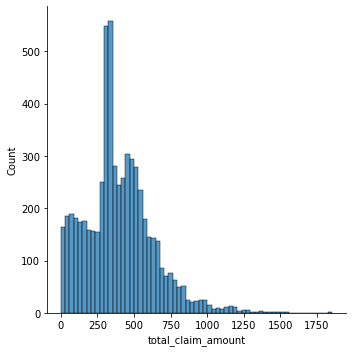

In [47]:
ic.plot_continous_var(y_train)

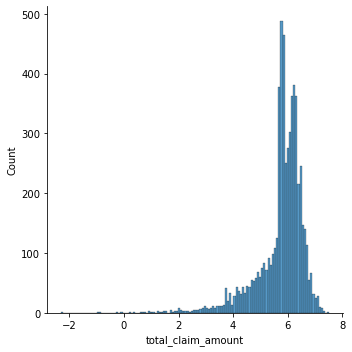

In [48]:
ic.plot_continous_var(y_train_log)

In [ ]:
# Great! Now define a function that takes a list of models and train (and tests) them
# so we can try a lot of them without repeating code.

In [96]:
def regression_automation(X_test, y_test, filename, X_train = None, y_train = None, train = True):
    if train:
        knn_models = search_k(X_train, y_train, X_test, y_test)
        var = int(input("Please enter k:"))
        files = []
        lr = LinearRegression()
        lr.fit(X_train, y_train)
        y_pred = lr.predict(X_test)
        filename_lr = filename + "_linear.sav"
        pickle.dump(lr, open(filename_lr, 'wb'))
        print("------Linear Regression------")
        print("-----------------------------")
        print("R2:",r2_score(y_test , y_pred))
        print("MSE:",mean_squared_error(y_test , y_pred))
        print("RMSE:",np.sqrt(mean_squared_error(y_test , y_pred)))
        print("MAE:",mean_absolute_error(y_test , y_pred))
        print("-----------------------------")
        print("Filename Linear: " + filename_lr)
        files.append(filename_lr)
        
        knn_models[var-2].score(X_test, y_test)
        y_pred = knn_models[var-2].predict(X_test)
        filename_knn = filename + "_knn.sav"
        pickle.dump(knn_models[var-2], open(filename_knn, 'wb'))
        print("--------------KNN------------")
        print("-----------------------------")
        print("R2:",r2_score(y_test , y_pred))
        print("MSE:",mean_squared_error(y_test , y_pred))
        print("RMSE:",np.sqrt(mean_squared_error(y_test , y_pred)))
        print("MAE:",mean_absolute_error(y_test , y_pred))
        print("-----------------------------")
        print("Filename knn: " + filename_knn)
        files.append(filename_knn)
        
        return files
    if train == False:
        loaded_linear = pickle.load(open(filename[0], 'rb'))
        y_pred = loaded_linear.predict(X_test)
        print("------Linear Regression------")
        print("-----------------------------")
        print("R2:",r2_score(y_test , y_pred))
        print("MSE:",mean_squared_error(y_test , y_pred))
        print("RMSE:",np.sqrt(mean_squared_error(y_test , y_pred)))
        print("MAE:",mean_absolute_error(y_test , y_pred))
        print("-----------------------------")
        
        loaded_knn = pickle.load(open("insurance_knn.sav", 'rb'))
        y_pred1 = loaded_knn.predict(X_test)
        print("--------------KNN------------")
        print("-----------------------------")
        print("R2:",r2_score(y_test , y_pred1))
        print("MSE:",mean_squared_error(y_test , y_pred1))
        print("RMSE:",np.sqrt(mean_squared_error(y_test , y_pred1)))
        print("MAE:",mean_absolute_error(y_test , y_pred1))
        print("-----------------------------")
        
    
    

In [97]:
def search_k(X_train, y_train, X_test, y_test):
    knn_models = []
    scores = []
    for k in range(2,15):
        model = KNeighborsRegressor(n_neighbors=k)
        model.fit(X_train, y_train)
        knn_models.append(model)
        scores.append(model.score(X_test, y_test))
    plt.figure(figsize=(10,6))
    plt.plot(range(2,15),scores,color = 'blue', linestyle='dashed',
    marker='o', markerfacecolor='red', markersize=10)
    plt.title('R2-scores vs. K Value')
    plt.xticks(range(1,16))
    plt.gca().invert_yaxis()
    plt.xlabel('K')
    plt.ylabel('Accuracy')
    plt.show()
    return knn_models
    
    

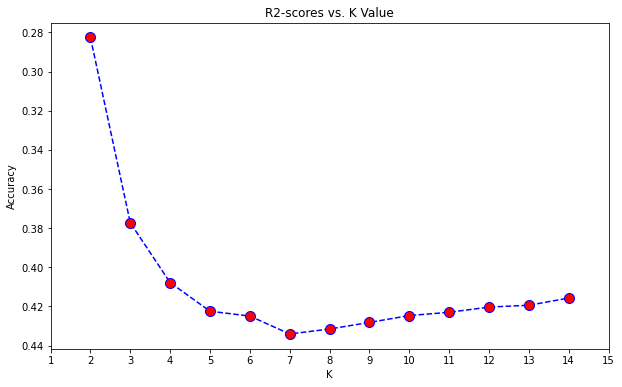

Please enter k:7
------Linear Regression------
-----------------------------
R2: 0.5200926563326927
MSE: 26361.54391847982
RMSE: 162.36238455528985
MAE: 121.47961744601375
-----------------------------
Filename Linear: insurance_linear.sav
--------------KNN------------
-----------------------------
R2: 0.43404846908588535
MSE: 31087.992994468685
RMSE: 176.31787485807752
MAE: 128.53620400057028
-----------------------------
Filename knn: insurance_knn.sav


In [99]:
file = regression_automation(X_test_final, y_test, "insurance", X_train=X_train_final, y_train=y_train)

In [98]:
regression_automation(X_test_final, y_test, file, train=False)

------Linear Regression------
-----------------------------
R2: 0.5200926563326927
MSE: 26361.54391847982
RMSE: 162.36238455528985
MAE: 121.47961744601375
-----------------------------
--------------KNN------------
-----------------------------
R2: 0.43404846908588535
MSE: 31087.992994468685
RMSE: 176.31787485807752
MAE: 128.53620400057028
-----------------------------


In [74]:
display(file)

['insurance_linear.sav', 'insurance_knn.sav']

In [100]:
# 12 . Check and discuss the results

In [ ]:
# Linera Regression slightly better - both are ok but not really good!